Summary (per site × dataset):


,site,dataset,days_with_obs,total_days,availability_days_frac
0,Benban,HLSL30_v2,48,365,0.131507
1,Bhadla,HLSL30_v2,24,365,0.065753
2,Cestas,HLSL30_v2,18,365,0.049315
3,Desert,HLSL30_v2,26,365,0.071233
4,Nuñez,HLSL30_v2,25,365,0.068493
5,Nyngan,HLSL30_v2,21,365,0.057534
6,Pirapora,HLSL30_v2,23,365,0.063014
7,Tengger,HLSL30_v2,31,365,0.084932
8,Topaz,HLSL30_v2,28,365,0.076712
9,Benban,L8_SR,45,365,0.123288


Daily grid (first rows):


,date,site,dataset,has_obs
0,2021-01-01,Bhadla,S2_SR,0
1,2021-01-02,Bhadla,S2_SR,0
2,2021-01-03,Bhadla,S2_SR,0
3,2021-01-04,Bhadla,S2_SR,0
4,2021-01-05,Bhadla,S2_SR,1


Per-scene timestamps (first rows):


,site,dataset,time
0,Bhadla,S2_SR,2021-01-05T06:01:30.265000
1,Bhadla,S2_SR,2021-01-10T06:01:29.111000
2,Bhadla,S2_SR,2021-01-15T06:01:30.637000
3,Bhadla,S2_SR,2021-01-20T06:01:29.629000
4,Bhadla,S2_SR,2021-01-25T06:01:30.352000


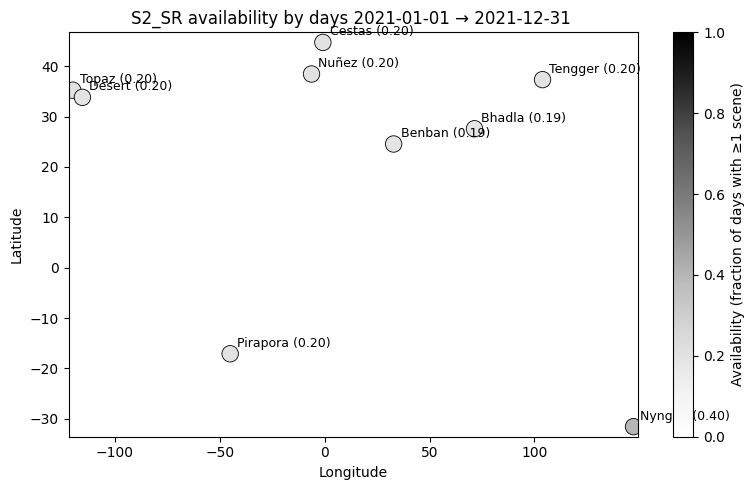

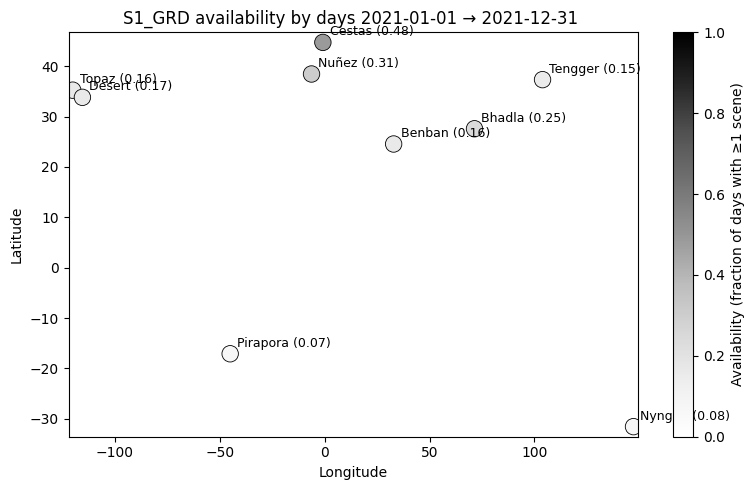

Top-3 datasets per site by days-availability:


,site,dataset,days_with_obs,total_days,availability_days_frac
18,Benban,MOD09GA,364,365,0.997260
54,Benban,VIIRS_VNP09GA,364,365,0.997260
36,Benban,S2_CloudScorePlus,72,365,0.197260
19,Bhadla,MOD09GA,364,365,0.997260
55,Bhadla,VIIRS_VNP09GA,364,365,0.997260
28,Bhadla,S1_GRD,90,365,0.246575
20,Cestas,MOD09GA,364,365,0.997260
56,Cestas,VIIRS_VNP09GA,364,365,0.997260
29,Cestas,S1_GRD,177,365,0.484932
21,Desert,MOD09GA,364,365,0.997260


In [ ]:
import ee, pandas as pd, numpy as np, datetime as dt
import matplotlib.pyplot as plt

# ee.Authenticate()
ee.Initialize()

SITES = [
    {"site": "Bhadla",         "lat": 27.5833,  "lon": 71.4333,   "buffer_m": 1000},
    {"site": "Tengger",        "lat": 37.3333,  "lon": 103.8558,  "buffer_m": 1000},
    {"site": "Topaz",          "lat": 35.2426,  "lon": -120.0096, "buffer_m": 1000},
    {"site": "Cestas",         "lat": 44.7255,  "lon": -0.8157,   "buffer_m": 1000},
    {"site": "Benban",         "lat": 24.5561,  "lon": 32.9016,   "buffer_m": 1000},
    {"site": "Nuñez",          "lat": 38.4533, "lon": -6.2260,    "buffer_m": 1000},
    {"site": "Desert",         "lat": 33.8214, "lon": -115.3939,  "buffer_m": 1000},
    {"site": "Pirapora",       "lat": -17.0891, "lon": -44.9878,  "buffer_m": 1000},
    {"site": "Nyngan",         "lat": -31.5575, "lon": 147.2031,  "buffer_m": 1000}
]
parks_df = pd.DataFrame(SITES)

def _geom(site_row):
    p = ee.Geometry.Point([site_row["lon"], site_row["lat"]])
    return p.buffer(site_row.get("buffer_m", 1000))

# time window
START = "2021-01-01"
END   = "2021-12-31"

DATASETS = {
    # Optical
    "S2_SR":              {"id": "COPERNICUS/S2_SR_HARMONIZED", "extra_filter": None},  # Sentinel-2 L2A
    "L8_SR":              {"id": "LANDSAT/LC08/C02/T1_L2",      "extra_filter": None},  # Landsat-8 L2
    "HLSL30_v2":          {"id": "NASA/HLS/HLSL30/v002",        "extra_filter": None},  # HLS L30
    "MOD09GA":            {"id": "MODIS/006/MOD09GA",           "extra_filter": None},  # MODIS SR (daily)
    "VIIRS_VNP09GA":      {"id": "NOAA/VIIRS/001/VNP09GA",      "extra_filter": None},  # VIIRS SR (daily)
    "S2_CloudScorePlus":  {"id": "GOOGLE/CLOUD_SCORE_PLUS/V1/S2_HARMONIZED", "extra_filter": None},
    # Radar
    "S1_GRD":             {"id": "COPERNICUS/S1_GRD",           "extra_filter": ee.Filter.eq('instrumentMode', 'IW')},
}

def _collection_for(dataset_id, region, start, end, extra_filter=None):
    ic = ee.ImageCollection(dataset_id).filterBounds(region).filterDate(start, end)
    if extra_filter is not None:
        ic = ic.filter(extra_filter)
    return ic

def _daily_histogram(ic):
    """
    Returns a dict { 'YYYY-MM-DD': count } for images in the collection.
    Works by tagging each image with a 'day' property and histogramming.
    """
    tagged = ic.map(lambda img: img.set('day', img.date().format('YYYY-MM-dd')))
    # aggregate_histogram returns an ee.Dictionary mapping day -> count
    hist = ee.Dictionary(tagged.aggregate_histogram('day'))
    return hist.getInfo()  # client-side dict

def _scene_times(ic, limit=50000):
    """
    Returns a sorted list of scene timestamps (ISO strings). Useful if you want exact times.
    Note: getInfo() pulls data to client; keep time ranges sensible.
    """
    ic_limited = ic.limit(limit)
    arr = ic_limited.aggregate_array('system:time_start')
    times = arr.getInfo()
    # convert ms since epoch -> ISO date strings
    return [pd.to_datetime(t, unit='ms').isoformat() for t in times]

# build availability table
rows_daily = []
rows_summary = []
rows_scenes = []

start_dt = pd.to_datetime(START)
end_dt   = pd.to_datetime(END)
all_days = pd.date_range(start_dt.floor("D"), end_dt.floor("D"), freq="D")
total_days = len(all_days)

for site in SITES:
    region = _geom(site)
    for ds_name, cfg in DATASETS.items():
        ic = _collection_for(cfg["id"], region, START, END, cfg["extra_filter"])
        # Per-day histogram {day: count}
        hist = _daily_histogram(ic)
        # availability by day (1 if ≥1 image that day)
        avail_map = {d: 1 if c >= 1 else 0 for d, c in hist.items()} if hist else {}
        # Build a dense daily frame for this site/dataset
        df_daily = pd.DataFrame({
            "date": all_days,
            "site": site["site"],
            "dataset": ds_name,
            "has_obs": [avail_map.get(d.strftime("%Y-%m-%d"), 0) for d in all_days]
        })
        rows_daily.append(df_daily)

        # Per-dataset summary for the site
        n_days_with_obs = int(df_daily["has_obs"].sum())
        rows_summary.append({
            "site": site["site"],
            "dataset": ds_name,
            "days_with_obs": n_days_with_obs,
            "total_days": total_days,
            "availability_days_frac": n_days_with_obs / max(total_days, 1)
        })

        times = _scene_times(ic)
        for t in times:
            rows_scenes.append({"site": site["site"], "dataset": ds_name, "time": t})

availability_daily  = pd.concat(rows_daily, ignore_index=True)
availability_summary = pd.DataFrame(rows_summary).sort_values(["dataset","site"]).reset_index(drop=True)
availability_scenes = pd.DataFrame(rows_scenes) if rows_scenes else pd.DataFrame(columns=["site","dataset","time"])

print("Summary (per site x dataset):")
display(availability_summary.head(20))

print("Daily grid (first rows):")
display(availability_daily.head())

print("Per-scene timestamps (first rows):")
display(availability_scenes.head())

# brightness map per dataset (brighter means higher availability by days)
def plot_availability_map(parks_df, summary_df, dataset_name, title_suffix=""):
    D = (parks_df.rename(columns={"site":"site"})
         .merge(summary_df[summary_df["dataset"] == dataset_name], on="site", how="left"))
    if D.empty:
        print(f"No rows for dataset {dataset_name}")
        return
    D["availability_days_frac"] = D["availability_days_frac"].fillna(0.0)
    fig, ax = plt.subplots(figsize=(8,5))
    sc = ax.scatter(D["lon"], D["lat"],
                    c=D["availability_days_frac"], s=140, cmap="Greys", vmin=0, vmax=1,
                    edgecolor="k", linewidth=0.6)
    cb = plt.colorbar(sc, ax=ax)
    cb.set_label("Availability (fraction of days with ≥1 scene)")
    for _, r in D.iterrows():
        ax.annotate(f'{r["site"]} ({r["availability_days_frac"]:.2f})',
                    (r["lon"], r["lat"]), textcoords="offset points", xytext=(5,5), fontsize=9)
    pad = 2
    ax.set_xlim(D["lon"].min()-pad, D["lon"].max()+pad)
    ax.set_ylim(D["lat"].min()-pad, D["lat"].max()+pad)
    ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
    ax.set_title(f"{dataset_name} availability by days {start_dt.date()} → {end_dt.date()} {title_suffix}")
    plt.tight_layout()

plot_availability_map(parks_df, availability_summary, "S2_SR")
plot_availability_map(parks_df, availability_summary, "S1_GRD")
plt.show()

# quick table of top-available datasets per site
best = (availability_summary.sort_values(["site","availability_days_frac"], ascending=[True,False])
        .groupby("site").head(3))
print("Top-3 datasets per site by days-availability:")
display(best)

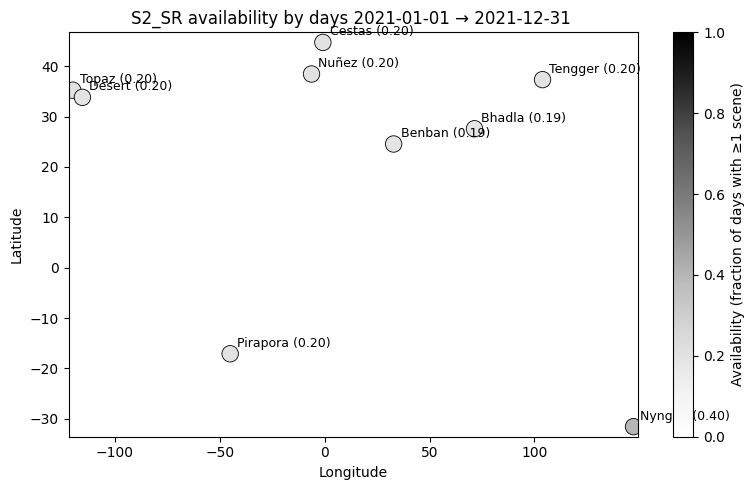

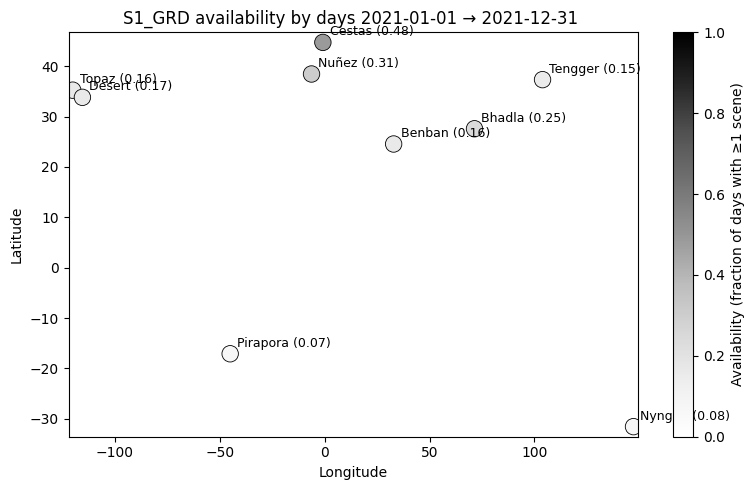

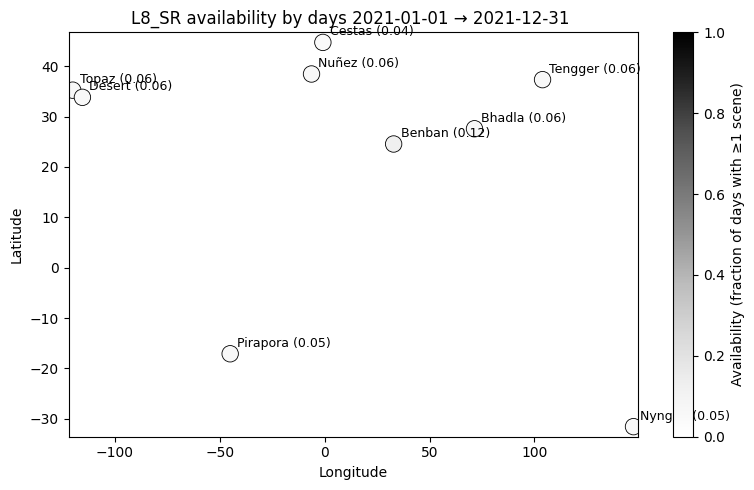

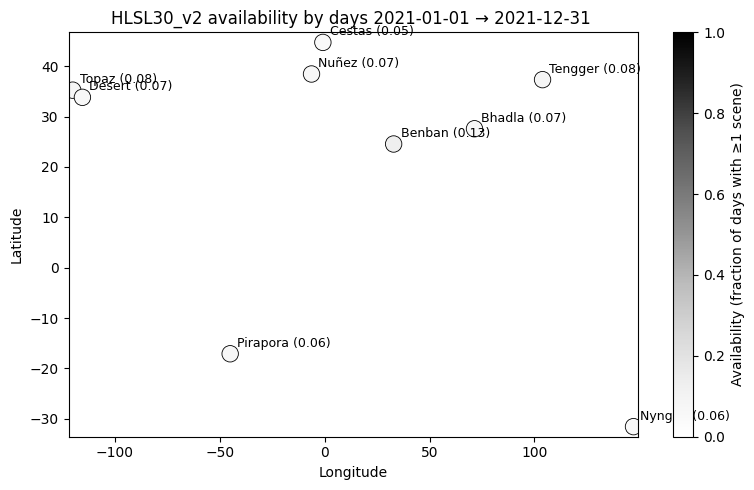

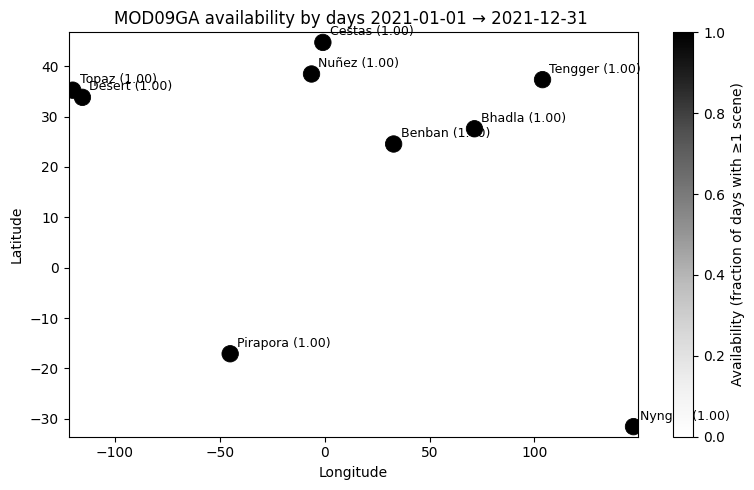

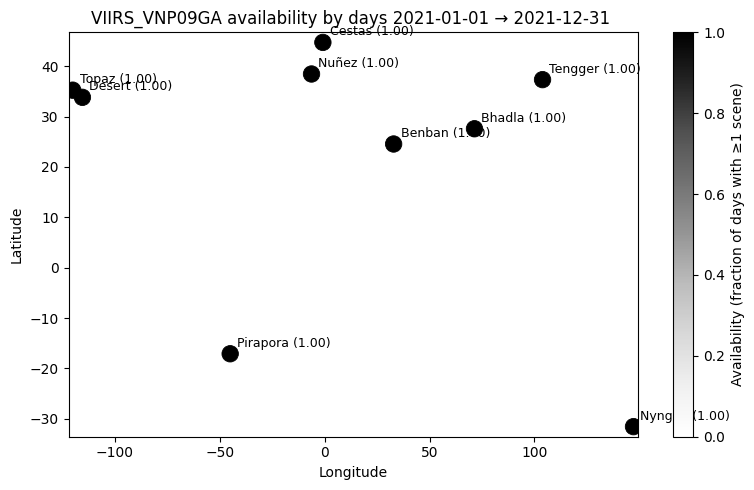

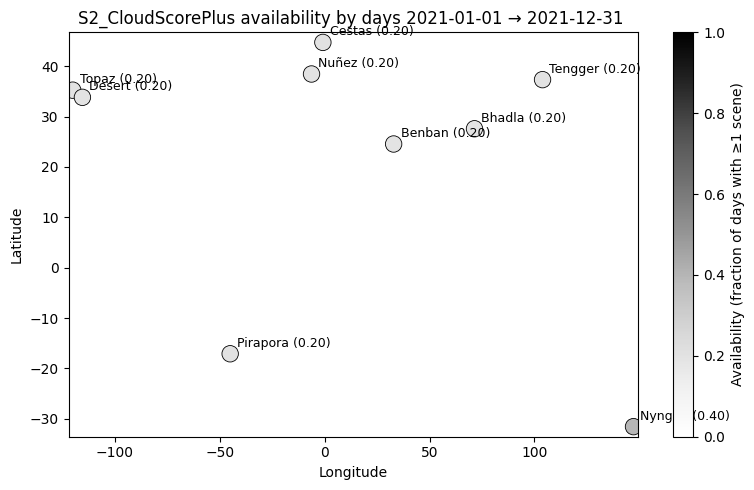

In [7]:
plot_availability_map(parks_df, availability_summary, "S2_SR")
plot_availability_map(parks_df, availability_summary, "S1_GRD")
plot_availability_map(parks_df, availability_summary, "L8_SR")
plot_availability_map(parks_df, availability_summary, "HLSL30_v2")
plot_availability_map(parks_df, availability_summary, "MOD09GA")
plot_availability_map(parks_df, availability_summary, "VIIRS_VNP09GA")
plot_availability_map(parks_df, availability_summary, "S2_CloudScorePlus")

plt.show()